In [2]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

NB : This Notebook for those who already know how a neural network work .This notebook aims to gives the reader a better understanding /visualising of those underneth mathamatics of neural network    

# What is Neural Network ? 

Artificial neural networks (ANN)  are computing systems that are inspired by brain. 
Similar to neurons in the brain,Neural Network has ‘mathematical neurons’ that are also intuitively connected to each other. They take inputs, do some simple computation on them and produce outputs.




# Single neuron

A single neuron calculates a weighted average of the input values (vector x) ,based on its current weight (vector w) and adds bias .Then result of this calculation is passed through a non-linear activation function g .

 $$z =  (w_1.x_1)+(w_2.x_2)+(w_3.x_3)+....+(w_n.x_n)  + b = w^T.x + b$$
 $$ \hat{y} = g(z)$$

# Activation Function

Activation functions are one of the key elements of the neural network.They are very simple yet they give the neural nets non-linearity . Without them, a neural network would become a combination of linear functions .

There are many powerfull activation function but for our project we'll use only 'Relu' and 'Sigmoid'

In [3]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):
    return np.maximum(0,Z)


# Single Layer

Let's find out how to perform calculation over a whole layer .
Each neuron in the layer performs a similar calculation according to the following equations -
$$ z_i^l = w^T_i.a^{[l-1]} + b_i$$     
$$a^l_i = g^l(z_i^l)$$


For calculation efficiency we'll use vectorization . 
we will build matrix W by stacking together horizontal vectors of weights w (transposed). Similarly, we will stack together bias of each neuron in the layer creating vertical vector B.
$$ Z^l = W^T.a^{[l-1]} + b^l$$     
$$a^l = g(Z^l)$$

In [4]:
def singleLayerForwordPropagation (weightMatrixOfCurrentLayer,biasOfCurrentLayer,outputValueOfPreviousLayer,activation = 'relu' ) :
    


    affineTransformationOfCurrentLayer = np.dot(weightMatrixOfCurrentLayer,
                                    outputValueOfPreviousLayer) + biasOfCurrentLayer
    
    
    if activation is "relu":
        activationFunc = relu
    elif activation is "sigmoid":
        activationFunc = sigmoid
    else:
        raise Exception('Non-supported activation function')
        
    return activationFunc(affineTransformationOfCurrentLayer), affineTransformationOfCurrentLayer

In [5]:
def fullForwordPropagation(inputLayer,nnArchitecture,layerWeightBias) :
    
    outputOfPreviousLayer = inputLayer # input layer
    forwordMemory = {}
    
    for previousLayerNum,layerInfo in enumerate(nnArchitecture):
        
        currentLayerNum = previousLayerNum+1

        currentLayerWeight = layerWeightBias['W_'+str(currentLayerNum)]
        currentLayerBias = layerWeightBias['B_'+str(currentLayerNum)]
        currentLayerActivation = layerInfo['activation']
        inputOfCurrentLayer = outputOfPreviousLayer

        outputOfCurrentLayer,affineTransformationOfCurrentLayer = singleLayerForwordPropagation(currentLayerWeight,currentLayerBias,inputOfCurrentLayer,currentLayerActivation)
        outputOfPreviousLayer = outputOfCurrentLayer

        forwordMemory['A_'+str(previousLayerNum)] = inputOfCurrentLayer
        forwordMemory['Z_'+str(currentLayerNum)] = affineTransformationOfCurrentLayer
        
    return outputOfCurrentLayer , forwordMemory

# Loss function
 Loss Function tell us how far we are from the ‘ideal’ solution . There is several loas function, but we using binary crossentropy .
 $$ J(W,b) =-\frac{1}{N}\sum_{i=0}^{N} K(y_i,\hat{y_i}) $$
$$ K(y,\hat{y}) = (ylog\hat{y} + (1-y)log(1-\hat{y}))$$

In [6]:
def getLoss(forwordOutput, actualValue):
    m = forwordOutput.shape[0]
    cost = -1 / m * (np.dot(actualValue, np.log(forwordOutput).T) + np.dot(1 - actualValue, np.log(1 - forwordOutput).T))
    return np.squeeze(cost)

# Gradient Descent 
Gradient descent method  finds a function minimum .Means it tell us which way we should go for finding the minimum loss . In each iteration we will calculate the values of the loss function partial derivatives with respect to each of the parameters of our neural network .

# Backpropagation

Backpropagation is an algorithm that allows us to calculate a very complicated gradient .The parameters of the neural network are adjusted according to the following formula 

$$ W^{[l]} = W^{[l]} -\alpha dW^{[l]} $$
$$ b^{[l]} = b^{[l]} -\alpha db^{[l]} $$

Here $\alpha$ is the learning rate . dW and db are calculated by chain rule,partial derivatives of loss function with respect to W and b. 

$$  dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) $$
$$  dA^{[l-1]} = W^{[l]T} * dZ^{[l]} $$
$$  db^{[l]} = \frac{1}{n} \sum_{i=0}^{n} dZ^{[l]i} $$
$$  dW^{[l]} = \frac{1}{n} dZ^{[l]}A^{[l-1]T} $$

In [7]:

def sigmoidBackward(dA, Z):
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)

def reluBackward(dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0;
    return dZ

In [8]:
def singleLayerBackwordPropagation (weightMatrixOfCurrentLayer,backwordInputValueOfCurrentLayer
                                    ,forwordAffineTransformationOfCurrentLayer,forwordOutputOfpreviousLayer,activation = 'relu' ) :
    
    m = forwordOutputOfpreviousLayer.shape[1]
    
    if activation is "relu":
        activationFunc = reluBackward
    elif activation is "sigmoid":
        activationFunc = sigmoidBackward
    else:
        raise Exception('Non-supported activation function')

    backwordAffineTransformationOfCurrentLayer = activationFunc(backwordInputValueOfCurrentLayer,forwordAffineTransformationOfCurrentLayer)

    backwordOutputOfCurrentLayer = np.dot(weightMatrixOfCurrentLayer.T,backwordAffineTransformationOfCurrentLayer)
    backwordBiasOfCurrentLayer = np.sum(backwordAffineTransformationOfCurrentLayer, axis=1, keepdims=True)/m
    backwordWeightOfCurrentLayer = np.dot(backwordAffineTransformationOfCurrentLayer,forwordOutputOfpreviousLayer.T)/m
    

        
    return backwordOutputOfCurrentLayer,backwordWeightOfCurrentLayer,backwordBiasOfCurrentLayer

For full backword propagation we need to start with calculating the derivative of the loss function with respect to the prediction vector,which is the output of forward propagation. The  formula - 
$$ -(\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}} ) $$

In [9]:
def fullBackwordPropagation(forwordOutput,actualValue,nnArchitecture,layerWeightBias,forwordMemory) :
    
    actualValue = actualValue.reshape(forwordOutput.shape)
    

    backwordOutputOfCurrentLayer = - (np.divide(actualValue, forwordOutput) - np.divide(1 - actualValue, 1 - forwordOutput))


    backwordWeightBias = {}
    actualValue = actualValue.reshape(forwordOutput.shape[1])
    for previousLayerNum,layerInfo in reversed(list(enumerate(nnArchitecture))):

        currentLayerNum = previousLayerNum+1
        

        
        currentLayerWeight = layerWeightBias['W_'+str(currentLayerNum)]
        forwordOutputOfpreviousLayer = forwordMemory['A_'+str(previousLayerNum)]

        
        forwordAffineTransformationOfCurrentLayer = forwordMemory['Z_'+str(currentLayerNum)]
        currentLayerActivation = layerInfo['activation']
        
        backwordInputOfCurrentLayer = backwordOutputOfCurrentLayer
        
        backwordOutputOfCurrentLayer,backwordWeight,backwordBias = singleLayerBackwordPropagation(currentLayerWeight
            ,backwordInputOfCurrentLayer ,forwordAffineTransformationOfCurrentLayer,forwordOutputOfpreviousLayer
                                                                ,currentLayerActivation)
        

        backwordWeightBias['W_'+str(currentLayerNum)] = backwordWeight
        backwordWeightBias['B_'+str(currentLayerNum)] = backwordBias
        
    return   backwordWeightBias

# Weight & BIas Update

parameters of the neural network are adjusted according to the following formula 

$$ W^{[l]} = W^{[l]} -\alpha dW^{[l]} $$
$$ b^{[l]} = b^{[l]} -\alpha db^{[l]} $$

Here $\alpha$ is the learning rate . dW and db are calculated by chain rule,partial derivatives of loss function with respect to W and b. 

In [10]:
def layerWeightBiasUpdate (layerWeightBias,backwordWeightBias,nnArchitecture,learningrate):
    
    for currentLayerNum,layerInfo in enumerate(nnArchitecture,1):

        layerWeightBias['W_'+str(currentLayerNum)] -= learningrate * backwordWeightBias['W_'+str(currentLayerNum)]
        
        layerWeightBias['B_'+str(currentLayerNum)] -= learningrate * backwordWeightBias['B_'+str(currentLayerNum)]

        
    return layerWeightBias

In [23]:
def convertProbIntoClass(probs):
    probs_ = np.copy(probs)
    probs_[probs_ > 0.5] = 1
    probs_[probs_ <= 0.5] = 0
    return probs_



def getAccuracy(forwordOutput, actualValue):
    predicted = convertProbIntoClass(forwordOutput)
    return (predicted == actualValue).mean()

In [12]:
def callback_numpy_plot(index, params):
    plotTitle = "NumPy Model - It: {:05}".format(index)
    fileName = "numpy_model_{:05}.png".format(index//50)
    filPath = os.path.join(outputDir, fileName)
    forwordOutput, _ = fullForwordPropagation(grid_2d, nnArchitecture, params)
    forwordOutput = forwordOutput.reshape(forwordOutput.shape[1], 1)
    makePlot(X_test, y_test, plotTitle, fileName=filPath, XX=XX, YY=YY, preds=forwordOutput, dark=True)

In [13]:
def makePlot(x, y, plotTitle, fileName=None, XX=None, YY=None, preds=None,dark=False):

    plt.figure(figsize=(10,8))
    axes = plt.gca()
    axes.set(xlabel="X1", ylabel="X2")
    plt.title(plotTitle, fontsize=25)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    if(XX is not None and YY is not None and preds is not None):
        plt.contourf(XX, YY, preds.reshape(XX.shape),25, alpha = 1, cmap=plt.cm.Spectral)
        plt.contour(XX, YY, preds.reshape(XX.shape),levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    plt.scatter(x[:, 0], x[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    if(fileName):
        plt.savefig(fileName)
        plt.close()

In [14]:
def initializeLayer (nnArchitecture,seed=5) :
    np.random.seed(seed)
    paramsValues = {}
    
    for idx,layerInfo in enumerate(nnArchitecture):
        layerNum = idx+1
        inputDim = layerInfo['inputDim']
        outputDim = layerInfo['outputDim']
        
        paramsValues ['W_' + str(layerNum)] = np.random.randn(outputDim,inputDim)*.1
        paramsValues ['B_' + str(layerNum)] = np.random.randn(outputDim,1)*.1
        
    return paramsValues

In [15]:
def train(initialData,actualValue, nnArchitecture, epochs, learningrate,verbose=False, callback=None):
    layerWeightBias = initializeLayer(nnArchitecture, 2)
    costHistory = []
    accuracyHistory = []
    
    for i in range(epochs):
        forwordOutput, forwordMemory = fullForwordPropagation(initialData, nnArchitecture ,layerWeightBias)
        cost = getLoss(forwordOutput, actualValue)
        costHistory.append(cost)
        accuracy = getAccuracy(forwordOutput, actualValue)
        accuracyHistory.append(accuracy)
        backwordWeightBias = fullBackwordPropagation(forwordOutput, actualValue,nnArchitecture, layerWeightBias,forwordMemory )

        layerWeightBias = layerWeightBiasUpdate(layerWeightBias, backwordWeightBias, nnArchitecture, learningrate)
        if(i % 50 == 0):
            if(verbose):
                print("Iteration: {:05} - cost: {:.5f} - accuracy: {:.5f}".format(i, cost, accuracy))
            if(callback is not None):
                callback(i, layerWeightBias)
        
    return layerWeightBias

In [16]:
samples = 1000
TEST_SIZE = 0.1
X, y = make_moons(n_samples = samples, noise=0.2, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)


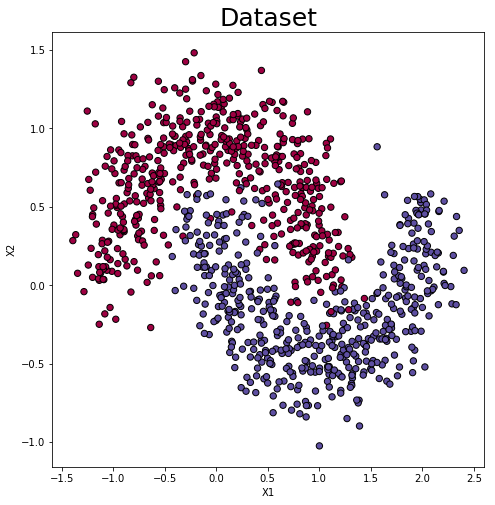

In [17]:
makePlot(X, y, "Dataset")

In [18]:
outputDir = "./NNvizualizations/"

In [19]:
grid = np.mgrid[-1.5:2.5:100j,-1:2:100j]
XX, YY = grid
grid_2d = grid.reshape(2, -1)

In [20]:
nnArchitecture = [
    {'inputDim':2,'outputDim':25,'activation':'relu'},
    {'inputDim':25,'outputDim':50,'activation':'relu'},
    {'inputDim':50,'outputDim':50,'activation':'relu'},
    {'inputDim':50,'outputDim':25,'activation':'relu'},
    {'inputDim':25,'outputDim':1,'activation':'sigmoid'}
]

In [24]:
params_values   = train(np.transpose(X_train), np.transpose(y_train.reshape((y_train.shape[0], 1))), nnArchitecture, 10000, 0.01,False,callback_numpy_plot)
forwordOutput, _= fullForwordPropagation(np.transpose(X_test ), nnArchitecture, params_values)
accuracy = getAccuracy(forwordOutput, np.transpose(y_test.reshape((y_test.shape[0], 1))))
print("Test set accuracy: {:.2f} ".format(accuracy))

/home/aninda/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Test set accuracy: 0.98 


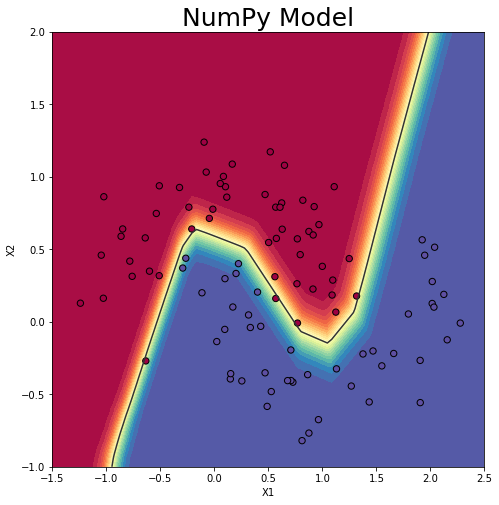

In [25]:
forwordOutput, _= fullForwordPropagation(grid_2d, nnArchitecture, params_values)
forwordOutput = forwordOutput.reshape(forwordOutput.shape[1], 1)
makePlot(X_test, y_test, "NumPy Model", fileName=None, XX=XX, YY=YY, preds=forwordOutput)
